In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt

In [2]:
year = "2023"

In [3]:
df = pd.read_csv("data/" + year + "_subs.csv")
df

,date,team,subs,minutes,result,goal_differential,total_minutes,sub_goals,sub_assists
0,2023-03-25,NC,2,"[65, 77]",W,1,142,0,0
1,2023-03-25,KC,4,"[75, 75, 75, 87]",L,-1,312,0,0
2,2023-03-25,SD,4,"[46, 58, 71, 81]",W,1,256,0,0
3,2023-03-25,CHI,5,"[13, 77, 77, 77, 84]",L,-1,328,0,0
4,2023-03-26,WAS,5,"[61, 76, 85, 85, 85]",W,1,392,0,0
...,...,...,...,...,...,...,...,...,...
259,2023-10-15,RGN,5,"[70, 70, 76, 88, 88]",W,3,392,0,0
260,2023-10-15,LA,5,"[64, 64, 72, 73, 82]",W,4,355,1,1
261,2023-10-15,POR,5,"[46, 46, 61, 62, 62]",L,-4,277,0,0
262,2023-10-15,SD,4,"[46, 46, 64, 72]",W,2,228,0,0


In [4]:
df.groupby(["team", "subs"]).count()

date  minutes  result  goal_differential  total_minutes  sub_goals  \
team subs                                                                       
CHI  2        1        1       1                  1              1          1   
     3        5        5       5                  5              5          5   
     4        7        7       7                  7              7          7   
     5        9        9       9                  9              9          9   
HOU  1        2        2       2                  2              2          2   
     3        5        5       5                  5              5          5   
     4        6        6       6                  6              6          6   
     5        8        8       8                  8              8          8   
     6        1        1       1                  1              1          1   
KC   2        1        1       1                  1              1          1   
     3        7        7       7                  7              7          7   
     4        7        7       7                  7              7          7   
     5        6        6       6                  6              6          6   
     6        1        1       1                  1              1          1   
LA   3        3        3       3                  3              3          3   
     4        7        7       7                  7              7          7   
     5       12       12      12                 12             12         12   
LOU  2        1        1       1                  1              1          1   
     3        3        3       3                  3              3          3   
     4       11       11      11                 11             11         11   
     5        7        7       7                  7              7          7   
NC   0        1        1       1                  1              1          1   
     2        3        3       3                  3              3          3   
     3        6        6       6                  6              6          6   
     4        5        5       5                  5              5          5   
     5        7        7       7                  7              7          7   
NJY  2        1        1       1                  1              1          1   
     3        3        3       3                  3              3          3   
     4        6        6       6                  6              6          6   
     5       12       12      12                 12             12         12   
ORL  2        1        1       1                  1              1          1   
     3        6        6       6                  6              6          6   
     4        7        7       7                  7              7          7   
     5        8        8       8                  8              8          8   
POR  2        1        1       1                  1              1          1   
     3        3        3       3                  3              3          3   
     4        3        3       3                  3              3          3   
     5       15       15      15                 15             15         15   
RGN  2        2        2       2                  2              2          2   
     3        2        2       2                  2              2          2   
     4        8        8       8                  8              8          8   
     5        9        9       9                  9              9          9   
     6        1        1       1                  1              1          1   
SD   3        5        5       5                  5              5          5   
     4       11       11      11                 11             11         11   
     5        6        6       6                  6              6          6   
WAS  2        5        5       5                  5              5          5   
     3        5        5       5          

In [5]:
df.groupby(["team"]).mean("subs").sort_values("subs")

,subs,goal_differential,total_minutes,sub_goals,sub_assists
team,,,,,
WAS,3.545455,-0.136364,264.409091,0.045455,0.090909
NC,3.590909,0.318182,260.136364,0.136364,0.090909
HOU,3.954545,-0.090909,279.772727,0.045455,0.000000
KC,3.954545,-0.272727,282.227273,0.272727,0.090909
ORL,4.000000,-0.045455,284.545455,0.181818,0.045455
SD,4.045455,0.409091,281.227273,0.272727,0.136364
CHI,4.090909,-1.000000,283.500000,0.227273,0.045455
LOU,4.090909,0.045455,290.409091,0.181818,0.045455
RGN,4.227273,0.227273,304.318182,0.181818,0.090909


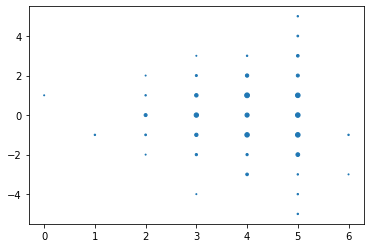

In [6]:
df2 = df.groupby(["subs", "goal_differential"]).agg(count= ("date", "count"))
plt.scatter(df2.index.get_level_values(0), df2.index.get_level_values(1), s=df2["count"])

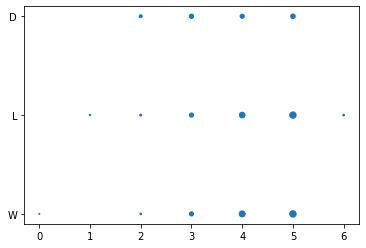

In [7]:
df3 = df.groupby(["subs", "result"]).agg(count= ("date", "count"))
plt.scatter(df3.index.get_level_values(0), df3.index.get_level_values(1), s=df3["count"])

In [8]:
def extract_from_list(minutes, i):
    minutes_list = json.loads(minutes)
    return minutes_list[i] if i < len(minutes_list) else None

for i in range(0,6):
    df["sub_" + str(i)] = df["minutes"].apply(lambda x: extract_from_list(x, i))

df

,date,team,subs,minutes,result,goal_differential,total_minutes,sub_goals,sub_assists,sub_0,sub_1,sub_2,sub_3,sub_4,sub_5
0,2023-03-25,NC,2,"[65, 77]",W,1,142,0,0,65.0,77.0,NaN,NaN,NaN,NaN
1,2023-03-25,KC,4,"[75, 75, 75, 87]",L,-1,312,0,0,75.0,75.0,75.0,87.0,NaN,NaN
2,2023-03-25,SD,4,"[46, 58, 71, 81]",W,1,256,0,0,46.0,58.0,71.0,81.0,NaN,NaN
3,2023-03-25,CHI,5,"[13, 77, 77, 77, 84]",L,-1,328,0,0,13.0,77.0,77.0,77.0,84.0,NaN
4,2023-03-26,WAS,5,"[61, 76, 85, 85, 85]",W,1,392,0,0,61.0,76.0,85.0,85.0,85.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,2023-10-15,RGN,5,"[70, 70, 76, 88, 88]",W,3,392,0,0,70.0,70.0,76.0,88.0,88.0,NaN
260,2023-10-15,LA,5,"[64, 64, 72, 73, 82]",W,4,355,1,1,64.0,64.0,72.0,73.0,82.0,NaN
261,2023-10-15,POR,5,"[46, 46, 61, 62, 62]",L,-4,277,0,0,46.0,46.0,61.0,62.0,62.0,NaN
262,2023-10-15,SD,4,"[46, 46, 64, 72]",W,2,228,0,0,46.0,46.0,64.0,72.0,NaN,NaN


In [9]:
df_agg = df.groupby(["team"]).agg(
    avg_subs=("subs", "mean"),
    sub_0_min=("sub_0", "mean"),
    sub_1_min=("sub_1", "mean"),
    sub_2_min=("sub_2", "mean"),
    sub_3_min=("sub_3", "mean"),
    sub_4_min=("sub_4", "mean"),
    sub_0_count=("sub_0", "count"),
    sub_1_count=("sub_1", "count"),
    sub_2_count=("sub_2", "count"),
    sub_3_count=("sub_3", "count"),
    sub_4_count=("sub_4", "count"),
)
df_agg

,avg_subs,sub_0_min,sub_1_min,sub_2_min,sub_3_min,sub_4_min,sub_0_count,sub_1_count,sub_2_count,sub_3_count,sub_4_count
team,,,,,,,,,,,
CHI,4.090909,56.954545,67.136364,73.428571,76.062500,83.111111,22,22,21,16,9
HOU,3.954545,54.545455,64.750000,76.550000,81.866667,91.000000,22,20,20,15,9
KC,3.954545,53.454545,68.136364,79.476190,83.571429,87.714286,22,22,21,14,7
LA,4.409091,57.272727,64.318182,70.272727,78.842105,82.083333,22,22,22,19,12
LOU,4.090909,57.136364,67.727273,73.285714,84.111111,84.142857,22,22,21,18,7
NC,3.590909,60.857143,69.476190,77.055556,83.833333,84.714286,21,21,18,12,7
NJY,4.318182,52.772727,65.590909,75.857143,79.944444,85.000000,22,22,21,18,12
ORL,4.000000,54.318182,68.772727,78.857143,82.466667,82.375000,22,22,21,15,8
POR,4.454545,55.590909,65.409091,70.428571,76.611111,80.533333,22,22,21,18,15


In [10]:
df_agg.to_csv("data/" + year + "_subs_agg.csv")

In [11]:
df_goals = df.groupby(["team"]).agg(
    sub_goals=("sub_goals", "sum"),
    sub_assists=("sub_assists", "sum"),
    sub_minutes=("total_minutes", "sum"),
)
df_goals

,sub_goals,sub_assists,sub_minutes
team,,,
CHI,5,1,6237
HOU,1,0,6155
KC,6,2,6209
LA,6,5,6704
LOU,4,1,6389
NC,3,2,5723
NJY,2,3,6656
ORL,4,1,6260
POR,5,1,6728


In [12]:
df_goals["sub_goals_per_min"] = df_goals["sub_goals"] / df_goals["sub_minutes"]
df_goals["sub_assists_per_min"] = df_goals["sub_assists"] / df_goals["sub_minutes"]

In [13]:
df_goals.sort_values("sub_goals_per_min")

,sub_goals,sub_assists,sub_minutes,sub_goals_per_min,sub_assists_per_min
team,,,,,
HOU,1,0,6155,0.000162,0.000000
WAS,1,2,5817,0.000172,0.000344
NJY,2,3,6656,0.000300,0.000451
NC,3,2,5723,0.000524,0.000349
RGN,4,2,6695,0.000597,0.000299
LOU,4,1,6389,0.000626,0.000157
ORL,4,1,6260,0.000639,0.000160
POR,5,1,6728,0.000743,0.000149
CHI,5,1,6237,0.000802,0.000160


In [14]:
df_goals.sort_values("sub_assists_per_min")

,sub_goals,sub_assists,sub_minutes,sub_goals_per_min,sub_assists_per_min
team,,,,,
HOU,1,0,6155,0.000162,0.000000
POR,5,1,6728,0.000743,0.000149
LOU,4,1,6389,0.000626,0.000157
ORL,4,1,6260,0.000639,0.000160
CHI,5,1,6237,0.000802,0.000160
RGN,4,2,6695,0.000597,0.000299
KC,6,2,6209,0.000966,0.000322
WAS,1,2,5817,0.000172,0.000344
NC,3,2,5723,0.000524,0.000349
